<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_3_6)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-3.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.6_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,31.699281,37.477453,57.726173,88.022999,-0.000587,224.925320,224.925723,-0.000404
1,0.0,1.0,42.685039,25.207478,31.861910,73.523337,-0.007033,183.270731,183.277498,-0.006768
2,0.0,2.0,26.070610,55.365238,56.026775,85.871461,0.000029,233.334113,233.333936,0.000177
3,0.0,3.0,79.805196,24.746661,86.514134,46.122687,0.000600,247.189277,247.188686,0.000591
4,0.0,4.0,51.985097,51.823467,76.983856,75.296257,-0.000700,266.087977,266.088599,-0.000622
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,33.452924,36.497364,50.255473,22.701842,-0.001256,152.906346,152.907584,-0.001237
249996,999.0,246.0,84.605381,35.376836,81.454153,88.269663,0.000393,299.706426,299.706063,0.000362
249997,999.0,247.0,44.479775,78.727442,43.765759,97.425959,0.000115,274.399050,274.398833,0.000217
249998,999.0,248.0,47.070926,66.851132,56.617370,68.972569,0.000195,249.512193,249.511981,0.000212


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    31.699281  37.477453  57.726173  88.022999 -0.000587  224.925320   
      1.0    42.685039  25.207478  31.861910  73.523337 -0.007033  183.270731   
      2.0    26.070610  55.365238  56.026775  85.871461  0.000029  233.334113   
      3.0    79.805196  24.746661  86.514134  46.122687  0.000600  247.189277   
      4.0    51.985097  51.823467  76.983856  75.296257 -0.000700  266.087977   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  33.452924  36.497364  50.255473  22.701842 -0.001256  152.906346   
      246.0  84.605381  35.376836  81.454153  88.269663  0.000393  299.706426   
      247.0  44.479775  78.727442  43.765759  97.425959  0.000115  274.399050   
      248.0  47.070926  66.851132  56.617370  68.972569  0.000195  249.512193   
      249.0  43.634995  77.538704  79.457061  72.533971 -0.000140  283.164591   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    224.925723 -0.000404  
      1.0    183.277498 -0.006768  
      2.0    233.333936  0.000177  
      3.0    247.188686  0.000591  
      4.0    266.088599 -0.000622  
...                 ...       ...  
999.0 245.0  152.907584 -0.001237  
      246.0  299.706063  0.000362  
      247.0  274.398833  0.000217  
      248.0  249.511981  0.000212  
      249.0  283.164823 -0.000232  

[250000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    31.699281  37.477453  57.726173  88.022999 -0.000587  224.925320   
      1.0    42.685039  25.207478  31.861910  73.523337 -0.007033  183.270731   
      2.0    26.070610  55.365238  56.026775  85.871461  0.000029  233.334113   
      3.0    79.805196  24.746661  86.514134  46.122687  0.000600  247.189277   
      4.0    51.985097  51.823467  76.983856  75.296257 -0.000700  266.087977   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  33.452924  36.497364  50.255473  22.701842 -0.001256  152.906346   
      246.0  84.605381  35.376836  81.454153  88.269663  0.000393  299.706426   
      247.0  44.479775  78.727442  43.765759  97.425959  0.000115  274.399050   
      248.0  47.070926  66.851132  56.617370  68.972569  0.000195  249.512193   
      249.0  43.634995  77.538704  79.457061  72.533971 -0.000140  283.164591   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    224.925723 -0.000404  
      1.0    183.277498 -0.006768  
      2.0    233.333936  0.000177  
      3.0    247.188686  0.000591  
      4.0    266.088599 -0.000622  
...                 ...       ...  
999.0 245.0  152.907584 -0.001237  
      246.0  299.706063  0.000362  
      247.0  274.398833  0.000217  
      248.0  249.511981  0.000212  
      249.0  283.164823 -0.000232  

[250000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,31.699281,37.477453,57.726173,88.022999,-0.000587,224.925320,224.925723,-0.000404
1,0.0,1.0,42.685039,25.207478,31.861910,73.523337,-0.007033,183.270731,183.277498,-0.006768
2,0.0,2.0,26.070610,55.365238,56.026775,85.871461,0.000029,233.334113,233.333936,0.000177
3,0.0,3.0,79.805196,24.746661,86.514134,46.122687,0.000600,247.189277,247.188686,0.000591
4,0.0,4.0,51.985097,51.823467,76.983856,75.296257,-0.000700,266.087977,266.088599,-0.000622
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,33.452924,36.497364,50.255473,22.701842,-0.001256,152.906346,152.907584,-0.001237
249996,999.0,246.0,84.605381,35.376836,81.454153,88.269663,0.000393,299.706426,299.706063,0.000362
249997,999.0,247.0,44.479775,78.727442,43.765759,97.425959,0.000115,274.399050,274.398833,0.000217
249998,999.0,248.0,47.070926,66.851132,56.617370,68.972569,0.000195,249.512193,249.511981,0.000212


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    31.699281  37.477453  57.726173  88.022999 -0.000587  224.925320   
      1.0    42.685039  25.207478  31.861910  73.523337 -0.007033  183.270731   
      2.0    26.070610  55.365238  56.026775  85.871461  0.000029  233.334113   
      3.0    79.805196  24.746661  86.514134  46.122687  0.000600  247.189277   
      4.0    51.985097  51.823467  76.983856  75.296257 -0.000700  266.087977   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  33.452924  36.497364  50.255473  22.701842 -0.001256  152.906346   
      246.0  84.605381  35.376836  81.454153  88.269663  0.000393  299.706426   
      247.0  44.479775  78.727442  43.765759  97.425959  0.000115  274.399050   
      248.0  47.070926  66.851132  56.617370  68.972569  0.000195  249.512193   
      249.0  43.634995  77.538704  79.457061  72.533971 -0.000140  283.164591   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    224.925723 -0.000404  
      1.0    183.277498 -0.006768  
      2.0    233.333936  0.000177  
      3.0    247.188686  0.000591  
      4.0    266.088599 -0.000622  
...                 ...       ...  
999.0 245.0  152.907584 -0.001237  
      246.0  299.706063  0.000362  
      247.0  274.398833  0.000217  
      248.0  249.511981  0.000212  
      249.0  283.164823 -0.000232  

[250000 rows x 8 columns]

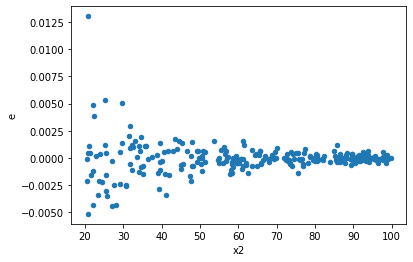

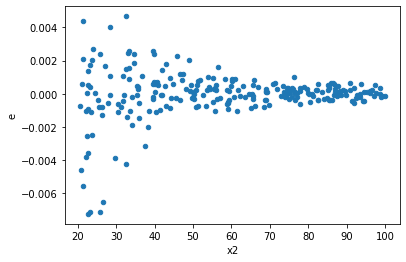

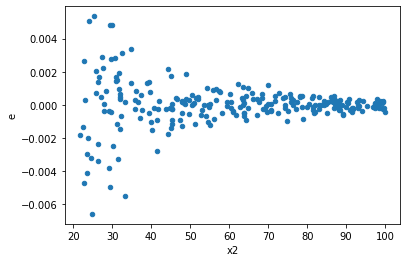

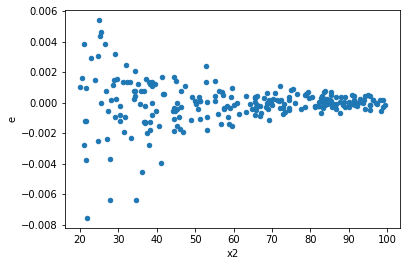

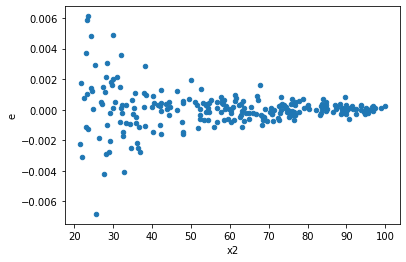

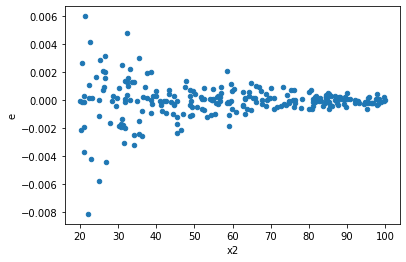

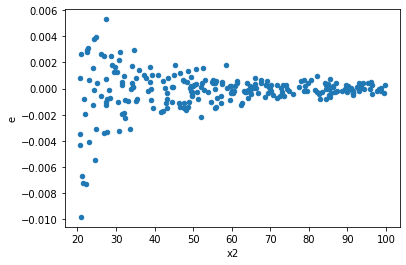

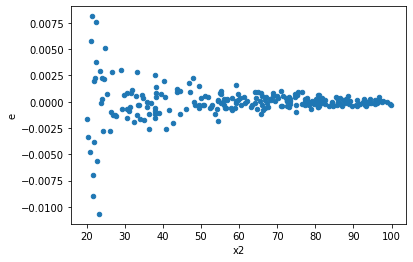

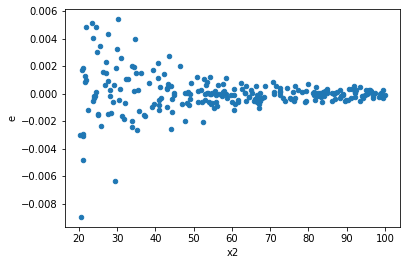

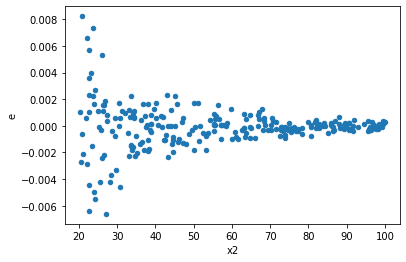

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,119.0,123.0,7.284287170365754e-05,0.0003120715406045844,6.121249722996432e-07,2.537166996785239e-06,4.144851315661179,4.8627768478581856e-14,0.9999999999999757,2.4313884239290928e-14,Reject005=0 : Heteroscedasticity
4.0,128.0,114.0,0.00013879057031595577,0.000356089031281367,1.0843013305934045e-06,3.123587993696202e-06,2.8807379513098623,1.9829541120230942e-08,0.9999999900852294,9.914770560115471e-09,Reject005=0 : Heteroscedasticity
5.0,109.0,133.0,9.423274793679063e-05,0.000367904872571375,8.645206232733085e-07,2.766202049408835e-06,3.1996946919961804,2.8661362172499594e-10,0.9999999998566932,1.4330681086249797e-10,Reject005=0 : Heteroscedasticity
7.0,124.0,118.0,0.00016237617636259826,0.00033957900659145867,1.3094852932467602e-06,2.8777881914530396e-06,2.1976483480145106,2.121412407518619e-05,0.9999893929379624,1.0607062037593096e-05,Reject005=0 : Heteroscedasticity
8.0,123.0,119.0,0.00013301542817679908,0.0002893227986242238,1.08142624533983e-06,2.4312840220523007e-06,2.248219915624748,1.2030274766594573e-05,0.9999939848626167,6.0151373832972865e-06,Reject005=0 : Heteroscedasticity
9.0,119.0,123.0,0.00016320728577460633,0.0004980845291048739,1.3714897964252632e-06,4.049467716299788e-06,2.952605062651267,5.77937542267648e-09,0.9999999971103123,2.88968771133824e-09,Reject005=0 : Heteroscedasticity
12.0,132.0,110.0,0.00011532933747494569,0.00033570421212558704,8.737071020829219e-07,3.051856473868973e-06,3.4929972145051043,7.307887628371645e-11,0.9999999999634606,3.653943814185823e-11,Reject005=0 : Heteroscedasticity
19.0,107.0,135.0,0.00012786756692175698,0.0005604090523509198,1.1950239899229623e-06,4.151178165562369e-06,3.4737195240992413,1.527289406055843e-11,0.9999999999923636,7.636447030279214e-12,Reject005=0 : Heteroscedasticity
22.0,111.0,131.0,5.842668612509105e-05,0.00041979477542671673,5.26366541667487e-07,3.204540270432952e-06,6.088039449242396,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,119.0,123.0,7.284287170365754e-05,0.0003120715406045844,6.121249722996432e-07,2.537166996785239e-06,4.144851315661179,4.8627768478581856e-14,Reject005=0 : Heteroscedasticity
1.0,114.0,128.0,0.0003767692873529444,0.00022806070446327627,3.3049937487100384e-06,1.7817242536193459e-06,0.5391006425699791,0.0008490211710230339,Reject005=0 : Heteroscedasticity
2.0,121.0,121.0,0.0003427545177986127,0.00020974884578141802,2.832681965277791e-06,1.73346153538362e-06,0.6119506378167044,0.007314852360845699,Reject005=0 : Heteroscedasticity
3.0,134.0,108.0,0.0002815073996200197,0.00010075807676586328,2.1008014897016394e-06,9.329451552394748e-07,0.4440901055206191,8.98818710419959e-06,Reject005=0 : Heteroscedasticity
4.0,128.0,114.0,0.00013879057031595577,0.000356089031281367,1.0843013305934045e-06,3.123587993696202e-06,2.8807379513098623,1.9829541120230942e-08,Reject005=0 : Heteroscedasticity
5.0,109.0,133.0,9.423274793679063e-05,0.000367904872571375,8.645206232733085e-07,2.766202049408835e-06,3.1996946919961804,2.8661362172499594e-10,Reject005=0 : Heteroscedasticity
6.0,126.0,116.0,0.00022086567529169506,8.456441539455146e-05,1.7529021848547228e-06,7.290035809875126e-07,0.4158837767938153,1.8634561459823794e-06,Reject005=0 : Heteroscedasticity
7.0,124.0,118.0,0.00016237617636259826,0.00033957900659145867,1.3094852932467602e-06,2.8777881914530396e-06,2.1976483480145106,2.121412407518619e-05,Reject005=0 : Heteroscedasticity
8.0,123.0,119.0,0.00013301542817679908,0.0002893227986242238,1.08142624533983e-06,2.4312840220523007e-06,2.248219915624748,1.2030274766594573e-05,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    951
Reject005=1 : Homoscedasticity       49
Name: Result_test, dtype: int64